In [1]:
import pandas as pd
import matplotlib as plt 
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
%matplotlib notebook
import joblib
from palettable import cmocean as cb
from palettable import tableau as tb
from altair import *
from IPython.display import display,SVG,Image
from collections import Counter
import inflect
p = inflect.engine()
import palettable.colorbrewer as cb

## Get list of 'csv' files

In [2]:
file_list0=glob('instacart_2017_05_01/*.csv')
file_list=[i.split('/')[1] for i in file_list0]
display(file_list)

['aisles.csv',
 'departments.csv',
 'order_products__prior.csv',
 'order_products__train.csv',
 'orders.csv',
 'products.csv',
 'order_products__train_prior.csv',
 'product_hour_with_percent.csv',
 'order_products__train_w_dept_id.csv']

In [3]:
products=pd.read_csv('instacart_2017_05_01/products.csv')
products.head()
pd_id_dist=dict(zip(products.product_id,products.product_name))

In [ ]:
pd_id_dist[1]

## Import all 'csv' files as Pandas dataframe

In [6]:
for item,path in zip(file_list,file_list0):
    exec('{} = pd.read_csv(\'{}\')'.format(item[:-4],path))


In [4]:
file_list

['aisles.csv',
 'departments.csv',
 'order_products__prior.csv',
 'order_products__train.csv',
 'orders.csv',
 'products.csv',
 'order_products__train_prior.csv',
 'product_hour_with_percent.csv',
 'order_products__train_w_dept_id.csv']

In [7]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
#order_products__train_prior=\
#pd.concat([order_products__train,order_products__prior],axis=0)

In [10]:
#order_products__train_prior.to_csv('instacart_2017_05_01/order_products__train_prior.csv')

In [11]:
order_products__train_prior.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,0,1,49302,1,1
1,1,1,11109,2,1
2,2,1,10246,3,0
3,3,1,49683,4,0
4,4,1,43633,5,1


In [13]:
#grouped=order_products__train_prior.loc[:,['order_id','product_id']].groupby('order_id') 

#order_product_gp1=grouped.aggregate(lambda x : list(x))

In [ ]:
order_product_gp.head()

In [ ]:
len(orders.order_id.unique())

In [ ]:
len(orders.order_id)

In [ ]:
order_product_gp.tail()

In [ ]:
#order_product_gp 

In [ ]:
product_hr=[]
for i in np.arange(24):
    order_index=orders[orders.loc[:,'order_hour_of_day'] == i]\
    ['order_id'].values
    values1=order_product_gp.loc[order_index,'product_id'].values
    
    product_hr.append(np.hstack(values1))

In [43]:
product_hr.head()

,Name,Count,Count_Percent,Hour
0,24852.0,2915,0.005933,0
1,13176.0,2837,0.007184,0
2,21137.0,1897,0.006884,0
3,21903.0,1838,0.007302,0
4,47209.0,1443,0.006533,0


In [ ]:
p.number_to_words(0)

In [ ]:
def return_count_hr(x,hour,name='Name'):
    xx = pd.DataFrame()
    unique,count=np.unique(x,return_counts=True)
    xx[name]=unique
    xx['Count']=count
    xx['Hour']=hour
    
    return xx.sort_values(['Count'],ascending=False)


In [ ]:
temp=[]
for i in range(len(product_hr)):
    temp.append(return_count_hr(product_hr[i],i))
    


In [ ]:
product_hr_fl=pd.concat(temp,axis=0)

In [ ]:
product_hr_fl.reset_index(inplace=True,drop=True)

In [ ]:
product_hr_fl.to_csv('instacart_2017_05_01/product_hour.csv')

In [ ]:
def get_hist(col_name):
    hist_hod=pd.DataFrame(col_name.value_counts())
    hist_hod.insert(0,'Name',hist_hod.index)
    hist_hod.reset_index(inplace=True,drop=True)
    return hist_hod


In [ ]:
product_hr_fl=pd.read_csv('instacart_2017_05_01/product_hour.csv',index_col=0)

In [ ]:

product_hr_fl.head()

In [ ]:
product_hr_fl_10=pd.DataFrame.copy(\
                                   product_hr_fl[product_hr_fl.loc[:,'Count'] > 10])

In [ ]:
normal_count=product_hr_fl_10.groupby('Name')['Count'].transform(lambda x: x/x.sum())

In [ ]:
product_hr_fl_10.insert(2,'Count_Percent',normal_count)
product_hr_fl_10.head()

In [ ]:
product_hr_fl_10.to_csv('instacart_2017_05_01/product_hour_with_percent.csv')

In [8]:
product_hr=pd.read_csv('instacart_2017_05_01/product_hour_with_percent.csv',index_col=0)

In [ ]:
product_hr.head()

In [ ]:
plt.figure()
g=sns.distplot(product_hr_mod.Count_Percent.values,bins=24,
            kde_kws={"color":"r","lw":2,"alpha":0.5},
            hist_kws={"color":"g","alpha":0.7})

g.set_xlabel('Percentage of Product Sold per Hour of Day')
g.set_ylabel('Density')
#plt.savefig('Percentage of Product Sold per Hour.pdf',transparent=True)

In [ ]:
hr_count=product_hr_mod.Count.values

In [ ]:
plt.figure()
plt.hist(hr_count[(hr_count > 100)],bins=200)

In [ ]:
plt.figure()
g=sns.distplot(hr_count[(hr_count > 100)],
            kde_kws={"color":"r","lw":2,"alpha":0.5},
            hist_kws={"color":"g","alpha":0.7})

g.set_xlabel('Percentage of Product Sold per Hour of Day')
g.set_ylabel('Density')
#plt.savefig('Percentage of Product Sold per Hour.pdf',transparent=True)

In [ ]:
product_hr.head()

In [ ]:
product_hr_mod=pd.DataFrame.copy(product_hr[product_hr['Count_Percent'] == 1])
product_hr_mod.head()

In [ ]:
len(product_hr_mod)


In [ ]:
idx=product_hr_mod.groupby('Hour')['Count_Percent'].transform(max) == product_hr_mod['Count_Percent']
product_hr_mod[idx]

In [ ]:
pd_id_dist[21137.0]

In [ ]:
product_hr.groupby('')

In [4]:
order_products__train=pd.read_csv('instacart_2017_05_01/order_products__train.csv')
product_hr_mod=pd.read_csv('instacart_2017_05_01/product_hour_with_percent.csv')

In [5]:
def get_hist(col_name):
    hist_hod=pd.DataFrame(col_name.value_counts())
    hist_hod.insert(0,'Name',hist_hod.index)
    hist_hod.reset_index(inplace=True,drop=True)
    hist_hod.columns=['product_id','Count']
    hist_hod['Precent']=hist_hod['Count']/hist_hod['Count'].sum()
    return hist_hod
hist_product=get_hist(order_products__train.product_id)

hist_product.head()

,product_id,Count,Precent
0,24852,18726,0.013524
1,13176,15480,0.011180
2,21137,10894,0.007868
3,21903,9784,0.007066
4,47626,8135,0.005875


In [6]:
temp=hist_product.iloc[:,0].apply(lambda x: pd_id_dist[x]).values
hist_product.insert(1,'product_name',temp)
hist_product.head(10)

,product_id,product_name,Count,Precent
0,24852,Banana,18726,0.013524
1,13176,Bag of Organic Bananas,15480,0.011180
2,21137,Organic Strawberries,10894,0.007868
3,21903,Organic Baby Spinach,9784,0.007066
4,47626,Large Lemon,8135,0.005875
5,47766,Organic Avocado,7409,0.005351
6,47209,Organic Hass Avocado,7293,0.005267
7,16797,Strawberries,6494,0.004690
8,26209,Limes,6033,0.004357
9,27966,Organic Raspberries,5546,0.004005


In [58]:
#new_product_hr.to_csv('new_product_hr_with count.csv')

In [53]:
new_product_hr=pd.DataFrame()
for i in np.arange(4000):
    #product_hr['Name'].values 
    #a=product_hr[product_hr['Name'] == hist_product.iloc[i,0]]['Count_Percent'].values
    a=product_hr[product_hr['Name'] == hist_product.iloc[i,0]][['Count','Hour']]
    a.index=a.Hour
    a.drop('Hour',axis=1,inplace=True)
    a.columns=[hist_product.iloc[i,1]]
    if i == 0:
        new_product_hr=a
        #print('ok')
        continue
    #print(i)
    new_product_hr=pd.concat([new_product_hr,a],axis=1)
        #new_product_hr[hist_product.iloc[i,1]]=a
        #print(hist_product.iloc[i,0],i)
        
    #print(new_product_hr.shape)

In [65]:
hist_product.iloc[:3600,2].sum()/hist_product.iloc[:,2].sum()

0.7494614034061404

<IPython.core.display.Javascript object>


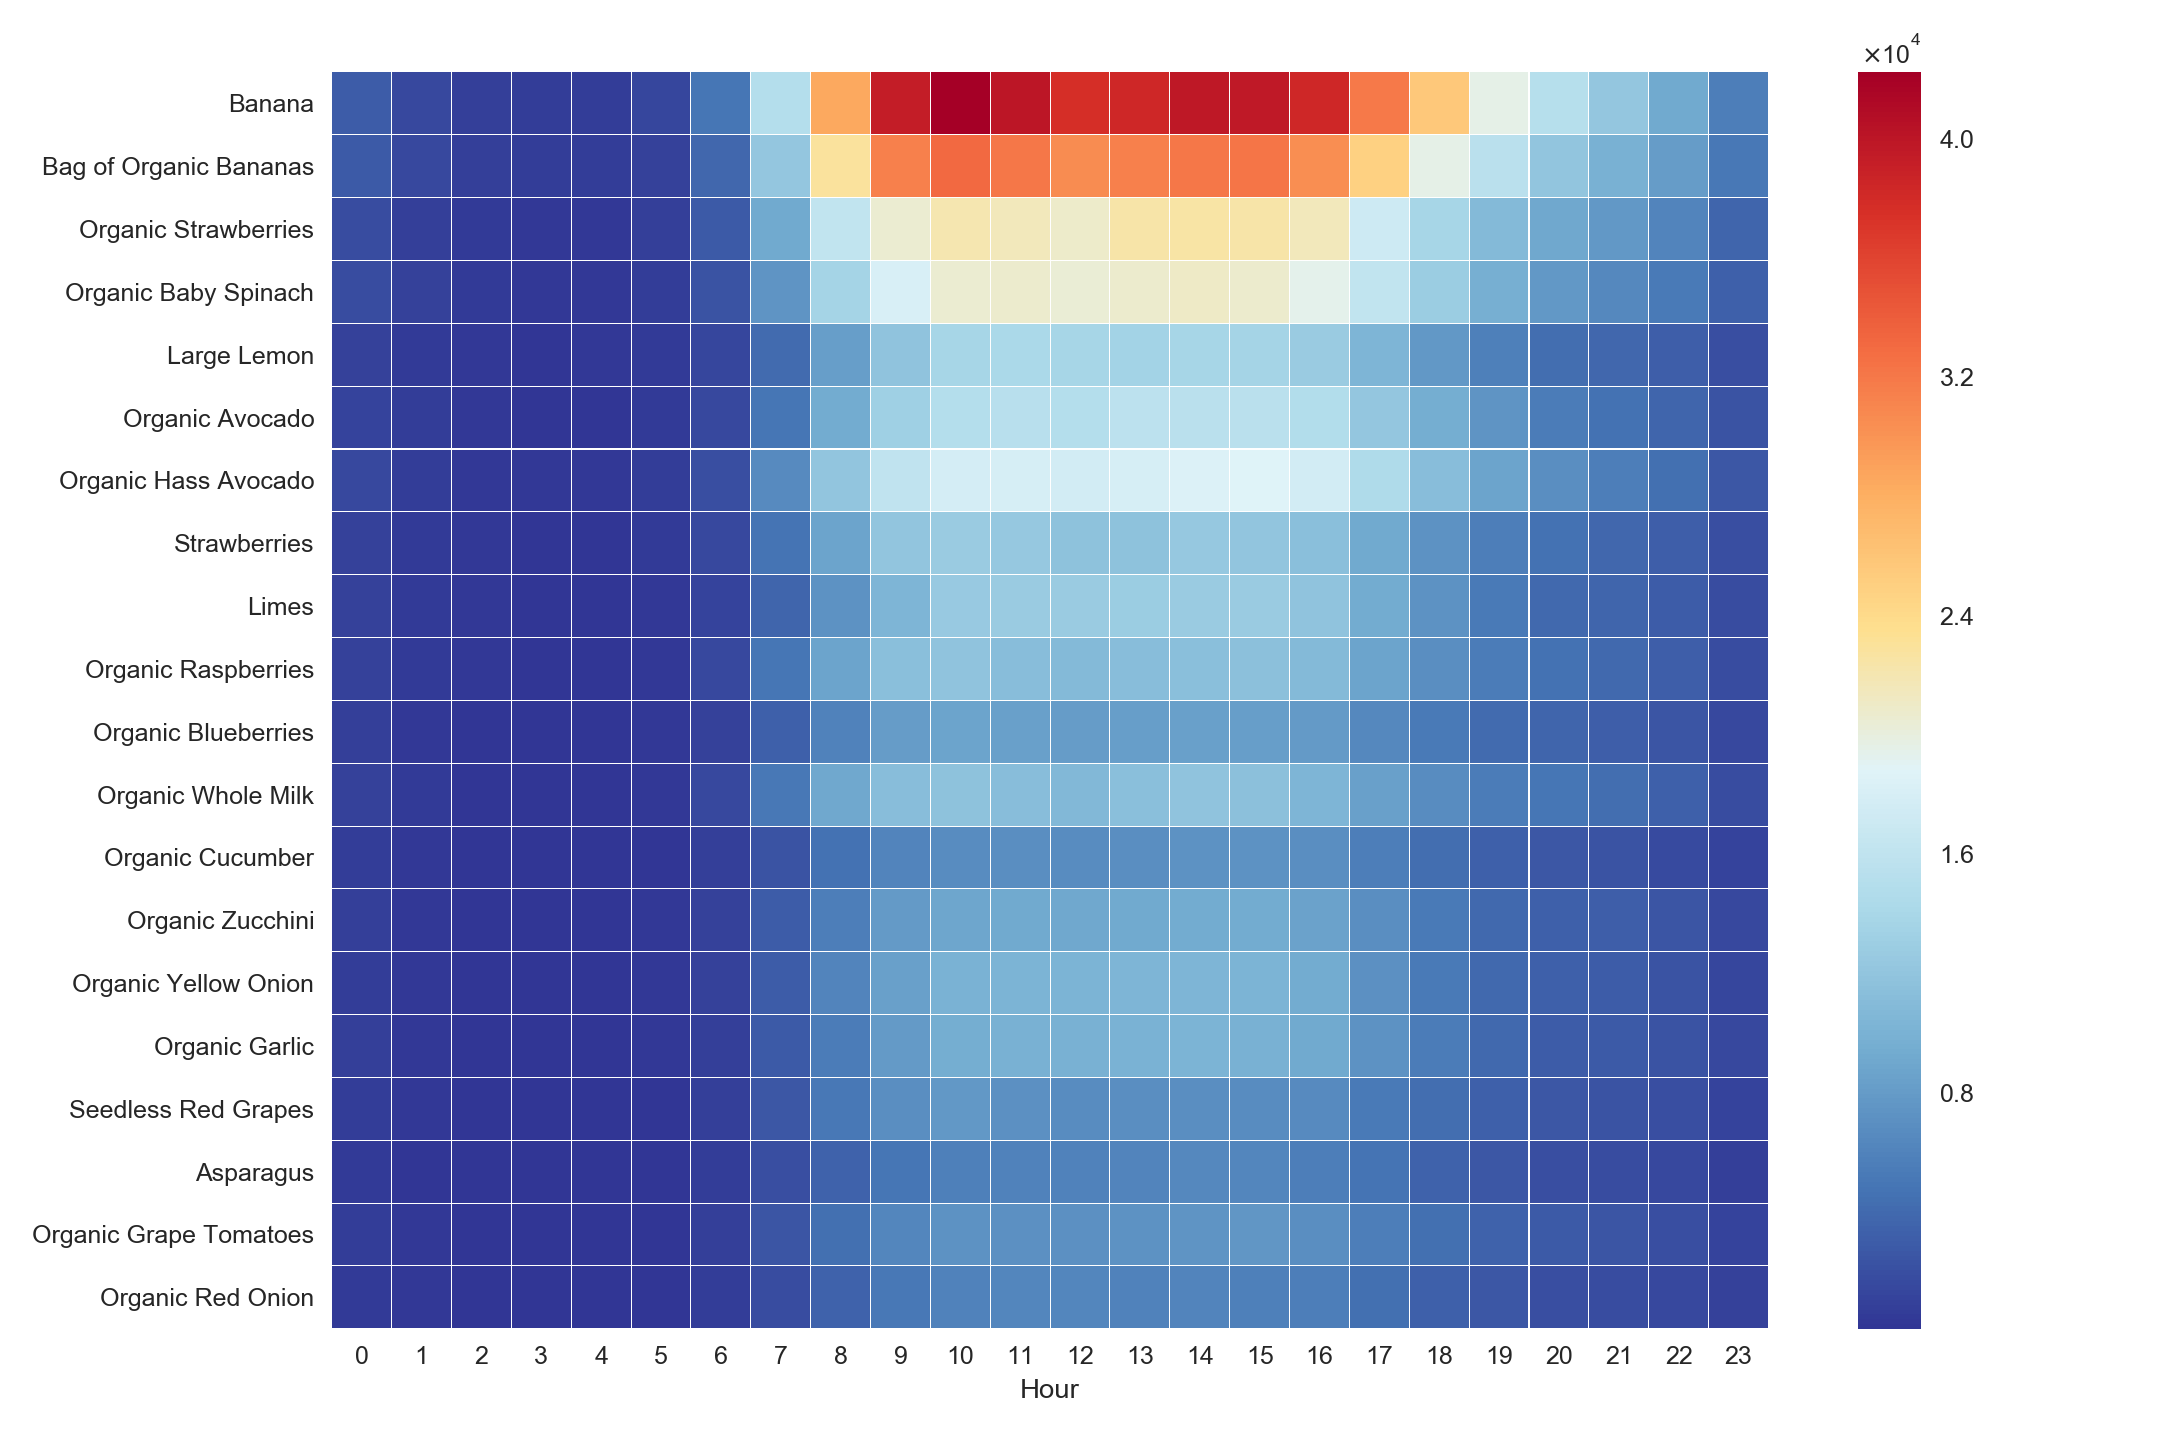

In [28]:
new_product_hr
plt.figure(figsize=(12,8))
sns.heatmap(new_product_hr.iloc[:,:20].transpose(), \
            cmap=cb.diverging.RdYlBu_10_r.mpl_colormap,\
            linewidths=0.01, annot=False)
plt.yticks(rotation=0)
plt.tight_layout()
#plt.savefig('Top_20 with Count2.pdf',transparent=True)

<IPython.core.display.Javascript object>


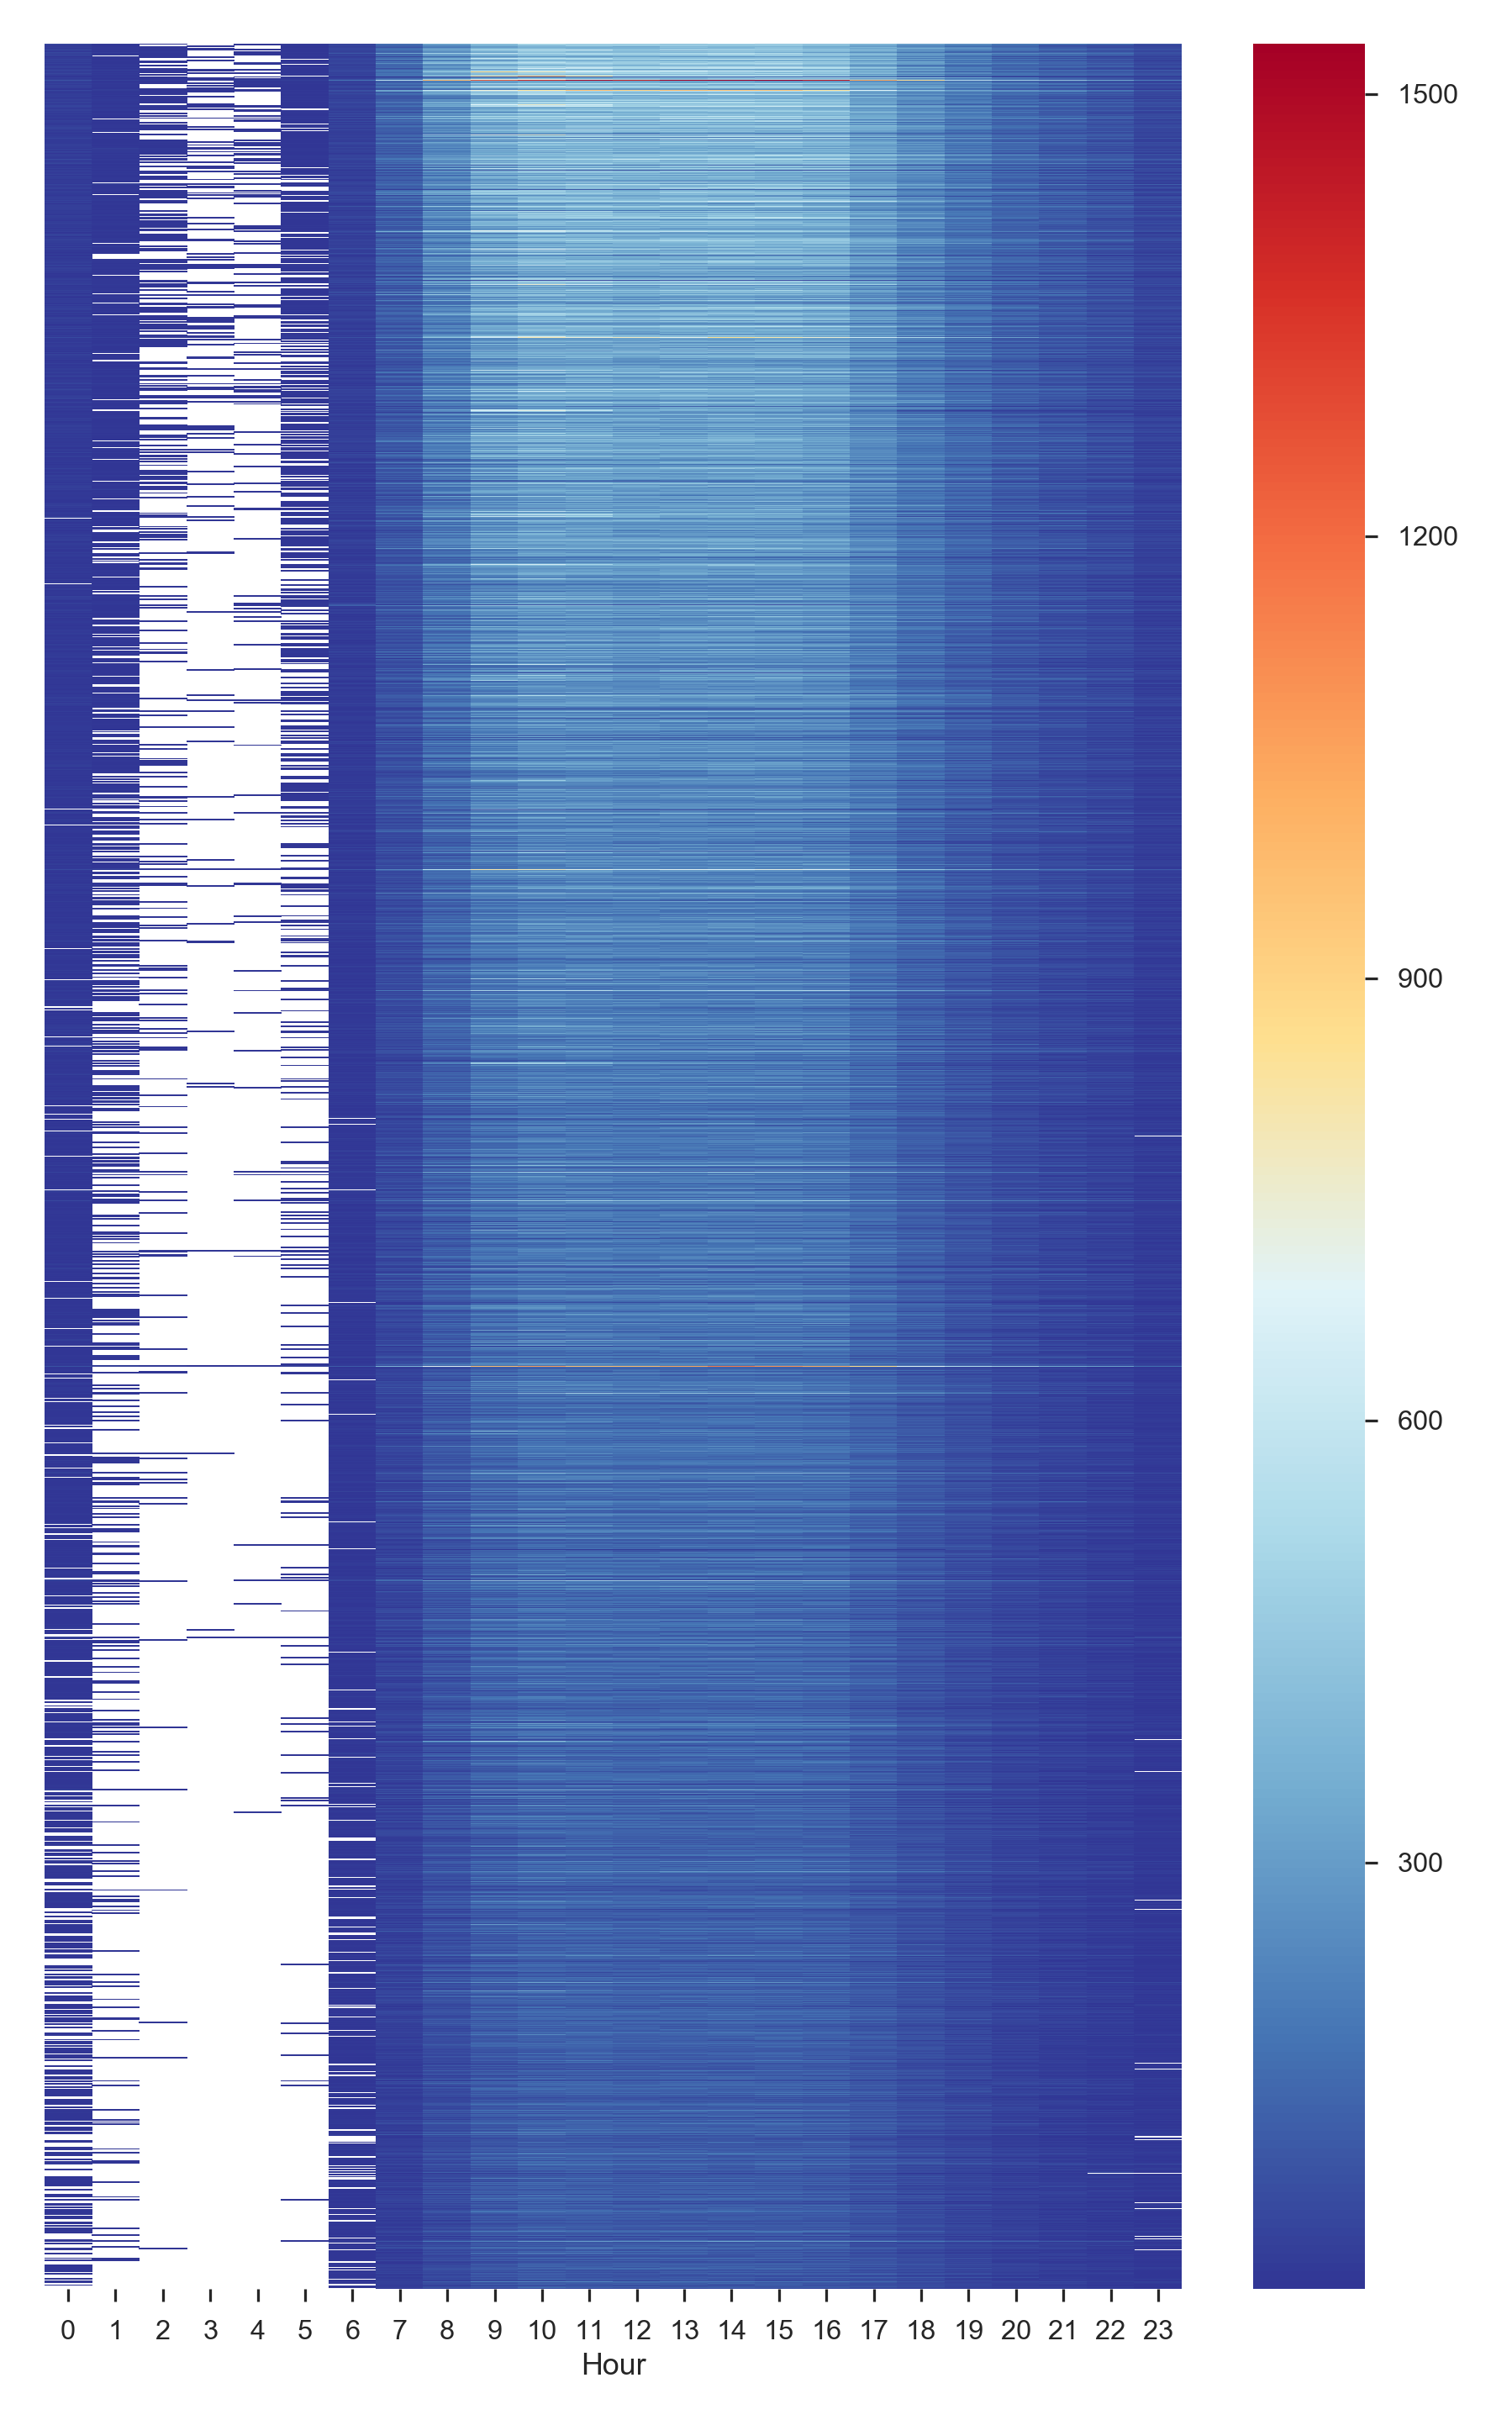

In [60]:
plt.figure(figsize=(10,16))
sns.heatmap(new_product_hr.iloc[:,1000:].transpose(),\
            #cmap=cb.diverging.RdYlGn_9_r.mpl_colormap,\
            cmap=cb.diverging.RdYlBu_10_r.mpl_colormap,\
            linewidths=0.0, annot=False,\
           yticklabels=False)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('Product with Count1000_4000_77.pdf',transparent=True)

<IPython.core.display.Javascript object>


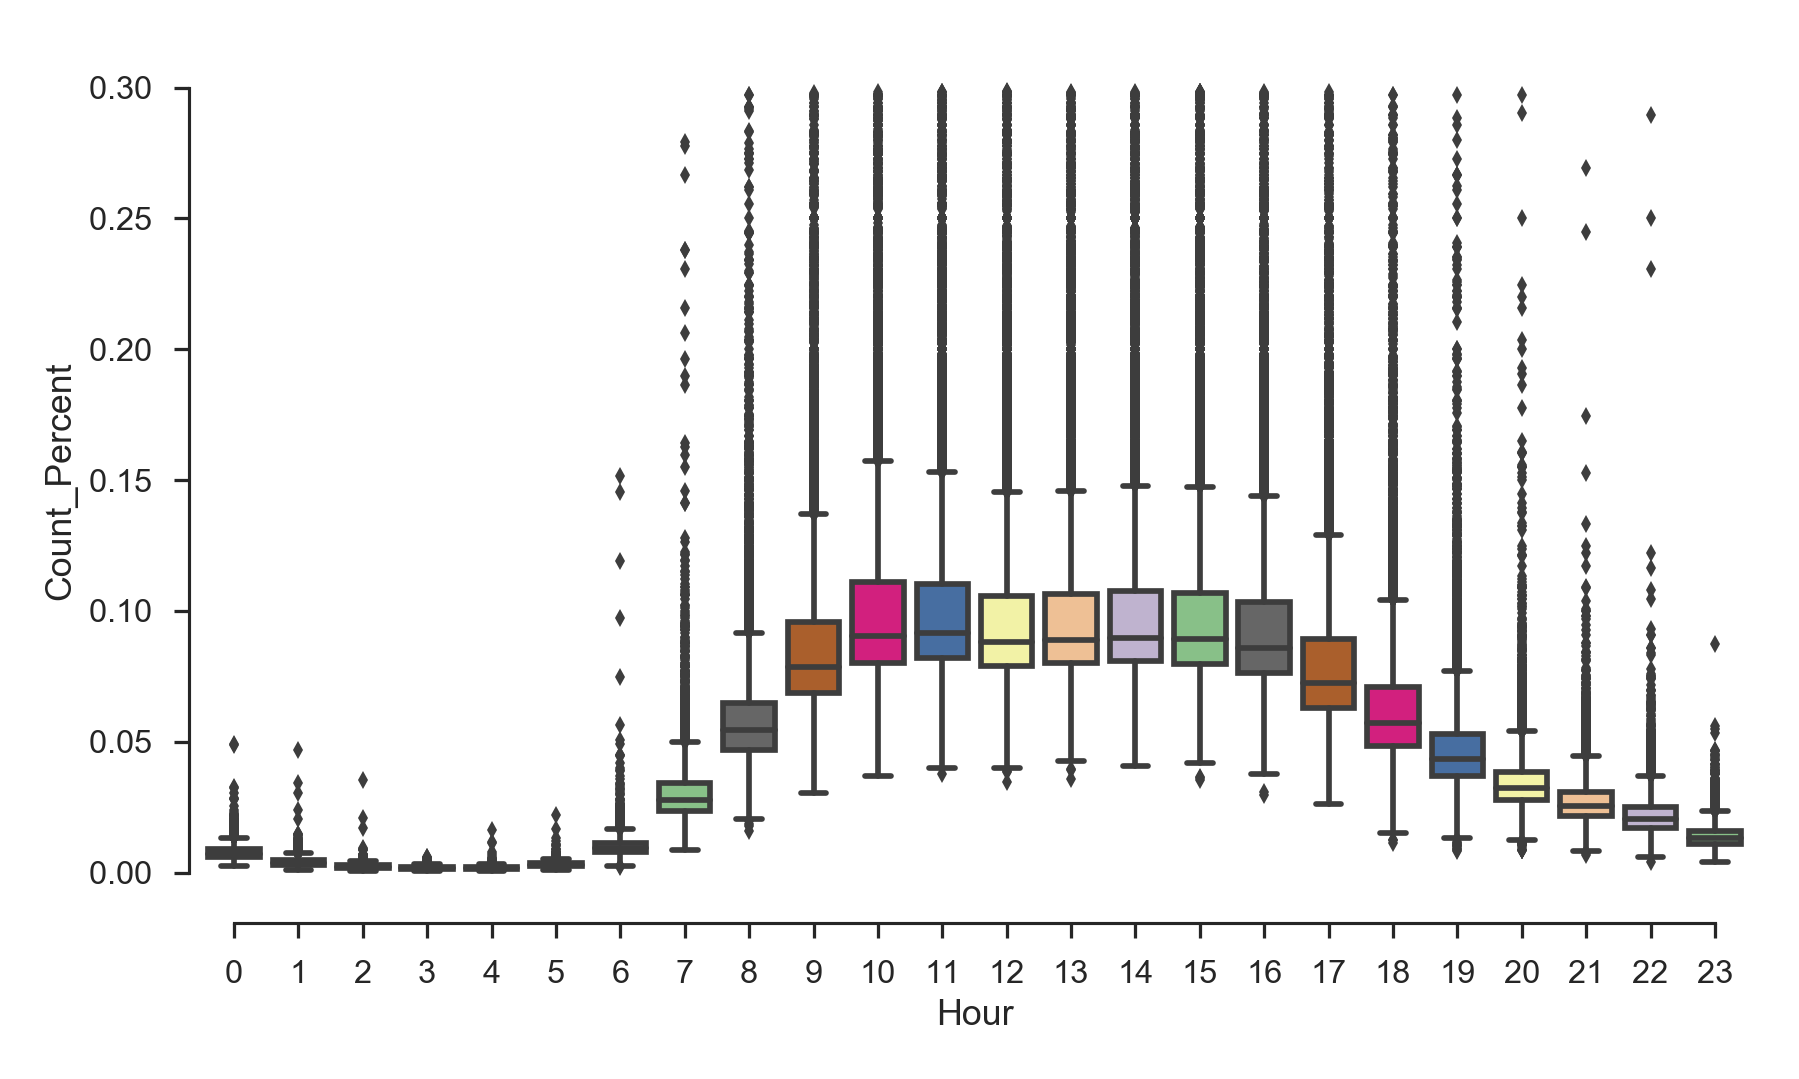

In [49]:
sns.set(style='ticks',context='talk')
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(x='Hour',y='Count_Percent',\
            palette=cb.qualitative.Accent_8_r.mpl_colors,ax=ax,\
            data=product_hr[product_hr['Count_Percent'] < 0.3])
sns.despine(ax=ax,top=True,bottom=False,trim=True,offset=5)
#plt.ylim(0,.6)
plt.tight_layout()
plt.savefig('Percentage of Product Sold per Hour with percent1.pdf',transparent=True)


In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Hour',y='Count_Percent',data=product_hr_fl_10)
#plt.savefig('Percentage of Product Sold per Hour with percent1.pdf',transparent=True)
plt.ylim(0,.2)
#plt.xlim(8,20)

In [ ]:
aa=hist_product[['product_name','Count']].head(10)

In [ ]:
aa.transpose()

In [61]:
hist_product

,product_id,product_name,Count,Precent
0,24852,Banana,18726,1.352432e-02
1,13176,Bag of Organic Bananas,15480,1.117999e-02
2,21137,Organic Strawberries,10894,7.867880e-03
3,21903,Organic Baby Spinach,9784,7.066214e-03
4,47626,Large Lemon,8135,5.875271e-03
5,47766,Organic Avocado,7409,5.350938e-03
6,47209,Organic Hass Avocado,7293,5.267161e-03
7,16797,Strawberries,6494,4.690106e-03
8,26209,Limes,6033,4.357162e-03
9,27966,Organic Raspberries,5546,4.005440e-03
